In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
# Reading the dataset
data = pd.read_csv(r"C:\Users\praya\Desktop\Work\Prodigy Task 4\twitter_training.csv", names=['ID Number', 'Topic', 'Sentiment', 'Tweet'], header=None)

In [3]:
data.head()

,ID Number,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
data.tail()

,ID Number,Topic,Sentiment,Tweet
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [5]:
data.shape

(74682, 4)

In [6]:
data.index

RangeIndex(start=0, stop=74682, step=1)

In [7]:
data.columns

Index(['ID Number', 'Topic', 'Sentiment', 'Tweet'], dtype='object')

In [8]:
data.describe()

,ID Number
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID Number  74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [10]:
data.isna().sum()

ID Number      0
Topic          0
Sentiment      0
Tweet        686
dtype: int64

In [11]:
# Defining a function to handle non-string values
def analyze_sentiment(text):
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        return 0.0

In [12]:
# Performing sentiment analysis and categorizing sentiment
data['Polarity'] = data['Tweet'].apply(analyze_sentiment)
data['Sentiment_Label'] = data['Polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

<Axes: xlabel='Sentiment_Label', ylabel='count'>

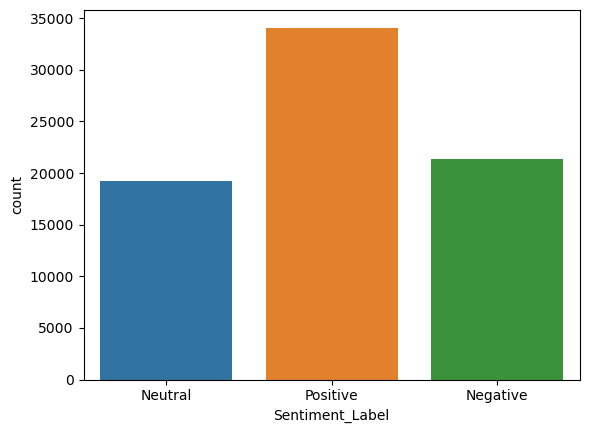

In [13]:
# Countplot to see how different sentiment are present 
sns.countplot(data=data,x=data['Sentiment_Label'])

<Axes: xlabel='Topic'>

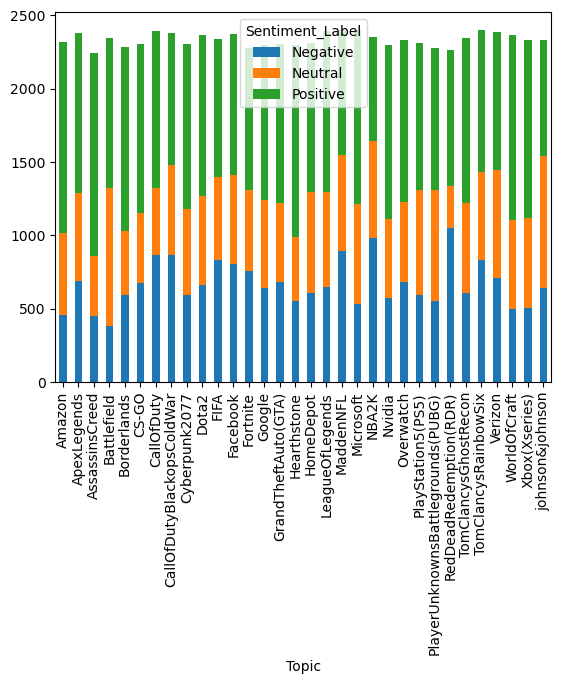

In [14]:
# Barplot to see different sentiment composition for different topics
sentiment_by_topic = data.groupby(['Topic', 'Sentiment_Label']).size().unstack(fill_value=0)
sentiment_by_topic.plot(kind='bar', stacked=True)

(array([  646.,   110.,   778.,   802.,  1035.,  3745.,  2140.,  3910.,
         4341.,  3845., 24742.,  6449.,  5222.,  4822.,  2048.,  4601.,
         1829.,   562.,  1273.,  1782.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

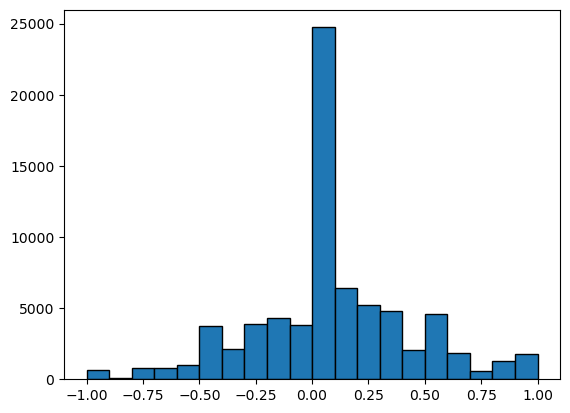

In [15]:
# Histogram to see the polarity of the sentiments
plt.hist(data['Polarity'], bins=20, edgecolor='k')

<Axes: xlabel='Topic'>

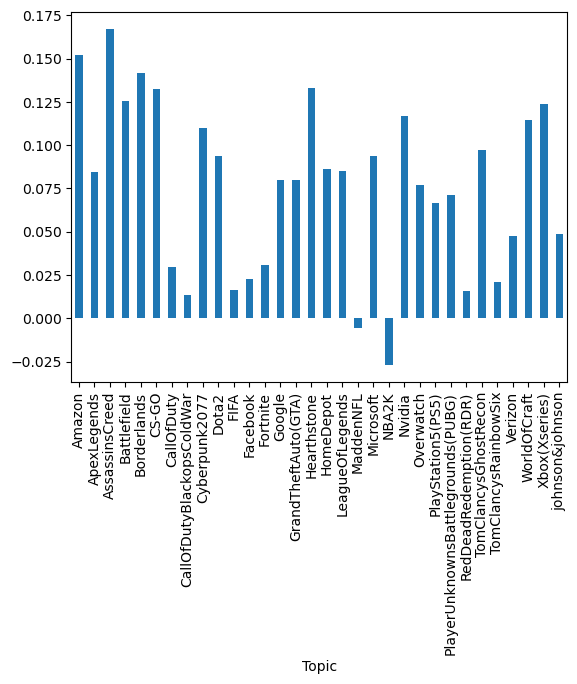

In [16]:
# Barplot to see polarity of sentiments for different topics
average_polarity_by_topic = data.groupby('Topic')['Polarity'].mean()
average_polarity_by_topic.plot(kind='bar')

In [17]:
# Printing most positive and most negtive tweet
most_positive_tweet = data[data['Polarity'] == data['Polarity'].max()]['Tweet'].values[0]
most_negative_tweet = data[data['Polarity'] == data['Polarity'].min()]['Tweet'].values[0]
print('Most Positive Tweet:')
print(most_positive_tweet)
print('\nMost Negative Tweet:')
print(most_negative_tweet)

Most Positive Tweet:
Platinum is the best loot @Borderlands  

Most Negative Tweet:
"What terrible bitch!"
